# Problem Set 1
## Learning from data [TIF285], Chalmers, Fall 2019

Last revised: 29-Aug-2019 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions

- See deadline on the course web page
- This problem set is performed individually (but collaboration is encouraged) and contains a number of basic and extra problems; you can choose which and how many to work on.
- See examination rules on the course web page.
- Hand-in is performed through the following **two** actions:
  - Upload of your solution in the form of a jupyter notebook, or python code, via Canvas.
  - Answer the correesponding questions on OpenTA.
  
  Note that the hand-in is not complete, and will not be graded, if any of those actions is not performed.

Fill your personal details
- Name: **Sebastian, Holmins**
- Personnummer: **970602-3679**
  <br/>
  (civic registration number)

## Problem 1
### (2 basic points)

#### Installations
Perform the installations and preparations that are described in the Getting Started instructions. At the end you should have:

1. downloaded the current version of the course material from the github repository or from the course web page;
2. a running python installation that includes the modules listed in the environment.yml file (e.g. numpy, matplotlib, pandas, emcee, scikit-learn, ...);
3. been able to open and run the Jupyter Notebooks with the first week excercises.
Ask the computer lab supervisors for assistance if needed.

In [2]:
# Import the python modules that are needed for this problem set here
#
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set('talk')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

## Problem 2
### (3 basic points)

#### Generate data

In [3]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

#### (a) Perform a linear regression using the Normal Equation
Create the design matrix for a quadratic polynomial and solve the normal equation using matrix inversion.

In [4]:
m = len(X) # number of instances
# The design matrix will have shape (m x 2)
# It is created by adding X^0 = 1 to each instance
X_d = np.c_[np.ones((m, 1)), X, X**2] 
theta = np.linalg.inv(X_d.T.dot(X_d)).dot(X_d.T).dot(y)
print(theta[0])
print(theta[1])
print(theta[2])

[2.11228054]
[0.72777588]
[0.61621274]


#### (b) Comparisons: 
Compare the coefficients from the true data generator and the normal equation. Plot the data and the model predictions in the same figure.

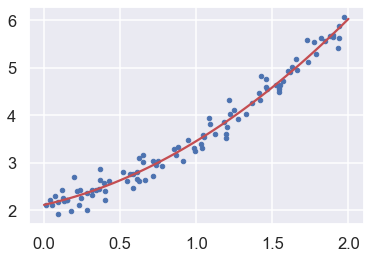

In [5]:
plt.plot(X,y,'.b') #plottar data
X_new = np.linspace(0,2,num=100) 
plt.plot(X_new,np.c_[np.ones((m, 1)), X_new, X_new**2].dot(theta),'r') # Evaluerar de nya x-värdena med beräknade theta

## Problem 3
### (3 basic points)

There are three files in the directory `DataFiles`:
- `dataset1.dat`
- `dataset2.dat`
- `dataset3.dat`

Each data files contains two columns. The first column corresponds to the independent variables (the array X), and the second column corresponds to the dependent ones (the array y).

#### (a) Perform linear regression with different models
- Load a data set and split it into 60% training and 40% validation data using the python commands below.
- For each data set you should then perform linear regression using polynomial models of order 1,2,3,4,5, and 20.
- Print the fit coefficients for each model and print also the mean-squared error (MSE) for both the training and the validation sets.

Questions to ponder:
- Which order polynomial do you think was used when generating the data?
- Which data set do you think has the most noise?

Data:  DataFiles/dataset1.dat
Degree:  1  Fit coefs:  [ 8.64449594 -1.23456593]
MSE training:  58.06150271116936
MSE val:  39.87895290105992
Degree:  2  Fit coefs:  [ 0.12905012 -0.6366678   2.58692409]
MSE training:  4.411974882287925
MSE val:  4.117577224817601
Degree:  3  Fit coefs:  [ 0.041779    1.26978243  2.52600994 -0.33172737]
MSE training:  2.3258165039679306
MSE val:  2.5440617206427314
Degree:  4  Fit coefs:  [ 1.99354331  0.99062846  0.50868938 -0.24964384  0.24951078]
MSE training:  0.009685068888272938
MSE val:  0.005507913415148873
Degree:  5  Fit coefs:  [ 1.99321069e+00  9.82284423e-01  5.09920902e-01 -2.45236024e-01
  2.49294053e-01 -4.41040648e-04]
MSE training:  0.009670316903143107
MSE val:  0.00561871676724554
Degree:  20  Fit coefs:  [ 1.96142647e+00  1.01584022e+00  9.46056467e-01 -4.15026159e-01
 -1.41630078e+00  1.57342336e-01  2.70365408e+00 -2.45487053e-02
 -2.21424450e+00 -2.91883229e-02  1.02081754e+00  1.71706825e-02
 -2.81717825e-01 -4.14136943e-03  4.7

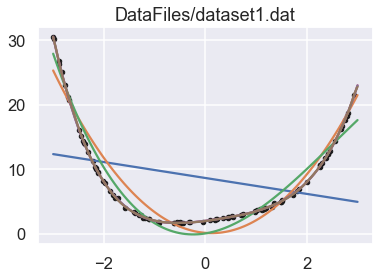

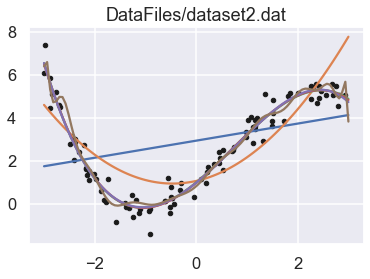

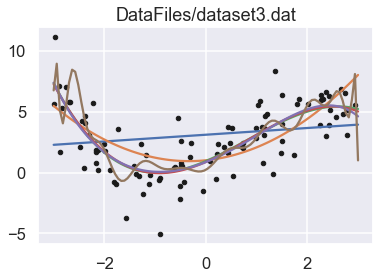

In [9]:
for datafile in 'DataFiles/dataset1.dat','DataFiles/dataset2.dat','DataFiles/dataset3.dat':
    print('Data: ', datafile)
    X, y = np.loadtxt(datafile, unpack=True)
    m = len(X)
    X = X.reshape(m,1); y = y.reshape(m,1)

    # built-in convenience function for splitting data
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.6, random_state=42)

    fig,ax = plt.subplots(1,1)
    ax.plot(X,y,'.k')
    for degree in [1,2,3,4,5,20]:
        poly_features = PolynomialFeatures(degree=degree, include_bias=True)
        X_poly = poly_features.fit_transform(X_train)
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly[:,1:], y_train) #Fitting with the bias excluded
        theta = np.append(lin_reg.intercept_,lin_reg.coef_)
        print('Degree: ',degree, ' Fit coefs: ',theta)
        y_predict = X_poly.dot(theta.reshape(degree+1,1)) #contructing new y values
        print('MSE training: ',mean_squared_error(y_train,y_predict))
        X_poly = poly_features.fit_transform(X_val)
        y_predict = X_poly.dot(theta.reshape(degree+1,1))
        print('MSE val: ',mean_squared_error(y_val,y_predict))
        X_new = np.linspace(-3, 3, 100).reshape(100, 1)
        X_poly = poly_features.fit_transform(X_new)
        ax.plot(X_new,lin_reg.predict(X_poly[:,1:]))
    ax.set_title(datafile);
    print('\n')

## Problem 4
### (2 basic points)

### Standard medical example by applying Bayesian rules of probability

Suppose there is an unknown disease (call it UD) and there is a test for it.

a. The false positive rate is 2.3%. ("False positive" means the test says you have UD, but you don't.) <br>
b. The false negative rate is 1.4%. ("False negative" means you have UD, but the test says you don't.)

Assume that 1 in 10,000 people have the disease. You are given the test and get a positive result.  Your ultimate goal is to find the probability that you actually have the disease. 
$% Some LaTeX definitions we'll use.
\newcommand{\pr}{\textrm{p}}
$

We'll do it using the Bayesian rules.

We'll use the notation:

* $H$ = "you have UD"
* $\overline H$ = "you do not have UD"  
* $D$ = "you test positive for UD"
* $\overline D$ = "you test negative for UD"  

1. *Before doing a calculation (or thinking too hard :), does your intuition tell you the probability you have the disease is high or low?*
<br>
<br>

2. *In the $p(\cdot | \cdot)$ notation, what is your ultimate goal?*
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD"  

3. *Express the false positive rate in $p(\cdot | \cdot)$ notation.* \[Ask yourself first: what is to the left of the bar?\]
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD"  


4. *Express the false negative rate in $p(\cdot | \cdot)$ notation. By applying the sum rule, what do you also know? (If you get stuck answering the question, do the next part first.)* 
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD"  


5. *Should $p(D|H) + p(D|\overline H) = 1$?
    Should $p(D|H) + p(\overline D |H) = 1$?
    (Hint: does the sum rule apply on the left or right of the $|$?)*
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD"  

6. *Apply Bayes' theorem to your result for your ultimate goal (don't put in numbers yet).
   Why is this a useful thing to do here?*
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD"  


7. Let's find the other results we need.  *What is $p(H)$?
  What is $p(\overline H)$?*
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD"  


8. Finally, we need $p(D)$.  *Apply marginalization first, and then
  the product rule twice to get an expression for $p(D)$ in terms of quantities
  we know.*
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD"  

9. *Now plug in numbers into Bayes' theorem and calculate the result.  What do you get?*
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD"  


## Problem 5 (extra)
### (3 extra points)

#### Reload the third dataset from Problem 3

In [7]:
datafile = 'DataFiles/dataset3.dat'
X, y = np.loadtxt(datafile, unpack=True)
m = len(X)
X = X.reshape(m,1); y = y.reshape(m,1)

#### Validation curves
Create a validation curve for the polynomial model (for different degrees) where you plot the training score and the validation score as a function of the model complexity. 
- The model complexity is simply the degree of the polynomial.
- For the computation of training and validation scores you are encouraged to use cross-validation which is more stable than the use of a single, random pair of training and validation sets.

Question to ponder:
- From this curve: Which order polynomial do you think was used when generating the data?

*Hint:* `scikit-learn` has a function `validation_curve` that might be useful. However, it is certainly instructive to implement the calculation of learning curves yourself.

## Problem 6 (extra)
### (3 extra points)

### Gradient descent methods

#### Regenerate the data from problem 2

In [8]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

#### (a) Batch and stochastic gradient descent
Implement both batch and stochastic gradient descent and use these methods to find the best fit parameters of a quadratic model.
- You might want to tune the learning hyperparameter $\eta$.
- Do 50 epochs for the SGD (each epoch corresponding to using all instances of data once)
- Compare with the solution from Problem 2.

#### (b) Mini-batch gradient descent
Implement mini-batch gradient descent and use this method to find the best fit parameters. Details:
- use a mini-batch size of 20%
- apply a similar learning schedule as in the SGD example (you might have to tune the learning hyperprameters)
- perform 50 epochs 
- hint: the `numpy.random.permutation` function might be useful for creating the mini-batches. 
- Compare with the solutions from BGD and SGD.

#### (c) Convergence
Compare the convergence pattern for the BGD, SGD and MGD, i.e. plot the path towards the optimal set of parameters. 
- Note that the path is in 3D (since there are three parameters in our quadratic model). You can plot 2D projections of the path.